# Thinkful Capstone Analytics Project 


#### Business Question 1: Why are good employees leaving their jobs? (What can we do to prevent attrition?) 


#### Business Question 2: When does attrition occur? (When do we need to think about intervening?)


#### Business Question 3: Looking at how to affect positive organizational change (We don't just want to keep employees at the company, we want to also make sure they're happy!)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
from scipy.stats import ttest_ind
import scipy.stats
%matplotlib inline

## Preliminary Assessment of Data

In [2]:
#read in .csv
df = pd.read_csv('HR_comma_sep.csv')

#preview first 5 rows of data frame
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
#Column assignment coventions taken from Randy Lao on Kaggle

df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [4]:
df.shape

(14999, 10)

In [5]:
turnover = df.turnover.value_counts()/14999

In [6]:
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


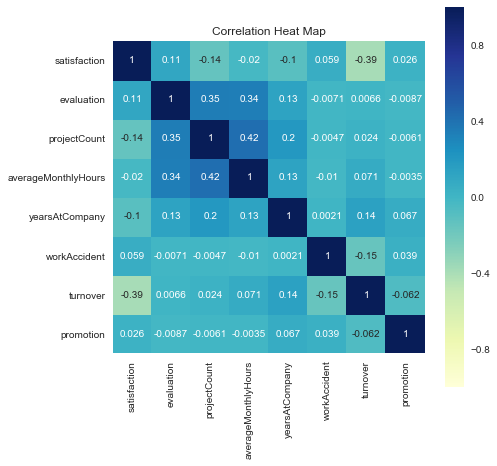

In [7]:
correlation = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map')


### What portion of employees are leaving? 

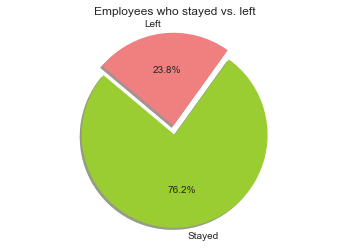

In [8]:
turnover

plt.title("Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [11428,3571]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()


In [9]:
df.turnover.value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

### Distribution of satisfaction

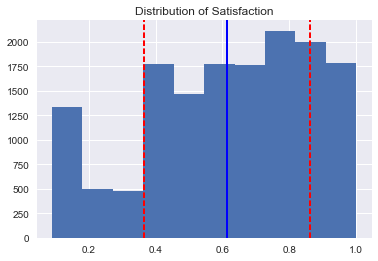

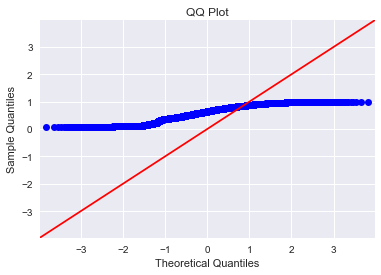

In [10]:
satisfaction = df['satisfaction']

plt.title('Distribution of Satisfaction')
#Plot distribution of attribute
plt.hist(satisfaction)

#Create solid line at mean
plt.axvline(satisfaction.mean(),color='b',linestyle='solid',linewidth=2)

#Create dotted line 1 st dev below mean
plt.axvline(satisfaction.mean()-satisfaction.std(),color='r',linestyle='dashed',linewidth=2)

#Create dotted line 1 st dev above mean
plt.axvline(satisfaction.mean()+satisfaction.std(),color='r',linestyle='dashed',linewidth=2)

#Show plot
plt.show()

sm.qqplot(satisfaction,line='45')
plt.title('QQ Plot')
pylab.show()

### Distribution of Average Monthly Hours

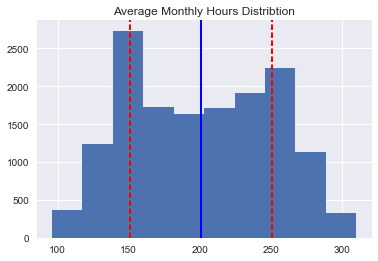

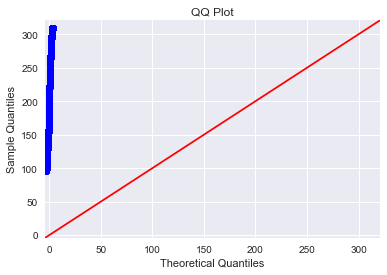

In [12]:
averageMonthlyHours = df['averageMonthlyHours']

plt.title('Average Monthly Hours Distribtion')

#Plot distribution of attribute
plt.hist(averageMonthlyHours)

#Create solid line at mean
plt.axvline(averageMonthlyHours.mean(),color='b',linestyle='solid',linewidth=2)

#Create dotted line 1 st dev below mean
plt.axvline(averageMonthlyHours.mean()-averageMonthlyHours.std(),color='r',linestyle='dashed',linewidth=2)

#Create dotted line 1 st dev above mean
plt.axvline(averageMonthlyHours.mean()+averageMonthlyHours.std(),color='r',linestyle='dashed',linewidth=2)

#Show plot
plt.show()

sm.qqplot(averageMonthlyHours,line='45')
plt.title('QQ Plot')
pylab.show()

### Distribution of projectCount

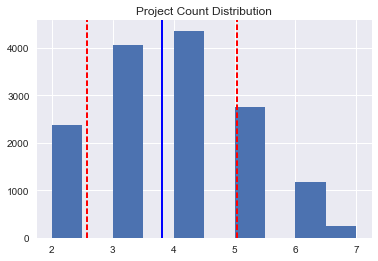

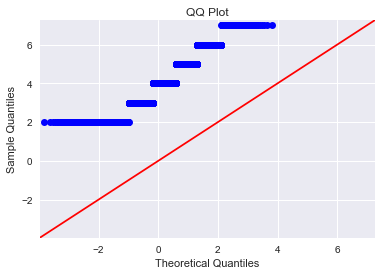

In [11]:
projectCount = df['projectCount']

plt.title('Project Count Distribution')

#Plot distribution of attribute
plt.hist(projectCount)

#Create solid line at mean
plt.axvline(projectCount.mean(),color='b',linestyle='solid',linewidth=2)

#Create dotted line 1 st dev below mean
plt.axvline(projectCount.mean()-projectCount.std(),color='r',linestyle='dashed',linewidth=2)

#Create dotted line 1 st dev above mean
plt.axvline(projectCount.mean()+projectCount.std(),color='r',linestyle='dashed',linewidth=2)

#Show plot
plt.show()

sm.qqplot(projectCount,line='45')
plt.title('QQ Plot')
pylab.show()

# BQ1: Why are good employees leaving their jobs? (What can we do to prevent attrition?) 


# Good Employees Who Stayed vs. Who Left: Pie chart summary

In [17]:
good_employees = df[df['evaluation'] > .7]

#plt.figure(figsize=(7,7))
#correlation = good_employees.corr()
#sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
#plt.title('Correlation Heat Map')

In [18]:
good_employees.turnover.value_counts()

0    5901
1    1901
Name: turnover, dtype: int64

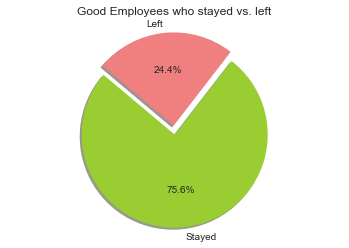

In [93]:


plt.title("Good Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [5901,1901]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

### Slicing data -- what differences in behavior are there between those who stay and those who leave? 


In [20]:
good_employees_left = good_employees[good_employees['turnover'] == 1]
good_employees_stayed = good_employees[good_employees['turnover'] == 0]

### Good Employees Who Stayed vs. Who Left: Differences in satisfaction

satisfaction & turnover - Pearson R =  (-0.34145072868698284, 2.8696382574929443e-212)  and satisfaction between good employees who left/stayed T-Test =  Ttest_indResult(statistic=32.08439434780577, pvalue=2.8696382574868446e-212) 


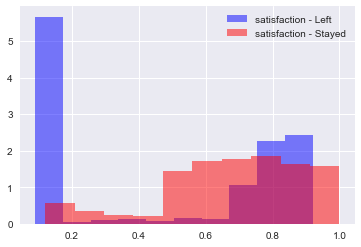

In [71]:
plt.hist(good_employees_left['satisfaction'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(good_employees_stayed['satisfaction'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

pear_r = scipy.stats.pearsonr(good_employees['satisfaction'],good_employees['turnover'])
ttest = ttest_ind(good_employees_stayed['satisfaction'],good_employees_left['satisfaction'])

print("satisfaction & turnover - Pearson R = ",pear_r," and satisfaction between good employees who left/stayed T-Test = ",ttest,"")


### Good Employees Who Stayed vs. Who Left: Time committed to work

averageMonthlyHours & turnover - Pearson R =  (0.4870738251442957, 0.0)  and averageMonthlyHours between good employees who left/stayed T-Test =  Ttest_indResult(statistic=-49.254781558929452, pvalue=0.0) 


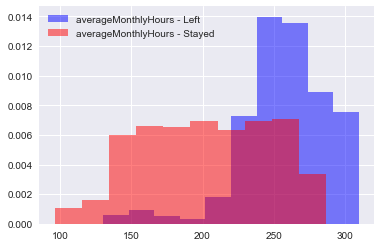

In [154]:
plt.hist(good_employees_left['averageMonthlyHours'],alpha=.5,color='blue',label='averageMonthlyHours - Left',normed=True)
plt.hist(good_employees_stayed['averageMonthlyHours'],alpha=.5,color='red',label='averageMonthlyHours - Stayed',normed=True)
plt.legend()

pear_r = scipy.stats.pearsonr(good_employees['averageMonthlyHours'],good_employees['turnover'])
ttest = ttest_ind(good_employees_stayed['averageMonthlyHours'],good_employees_left['averageMonthlyHours'])

print("averageMonthlyHours & turnover - Pearson R = ",pear_r," and averageMonthlyHours between good employees who left/stayed T-Test = ",ttest,"")



### Good Employees Who Stayed vs. Who Left: Project commitments

projectCount & turnover - Pearson R =  (0.54097413566527808, 0.0)  and projectCount between good employees who left/stayed T-Test =  Ttest_indResult(statistic=-56.80774495308998, pvalue=0.0) 


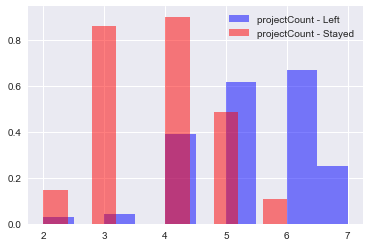

In [73]:
plt.hist(good_employees_left['projectCount'],alpha=.5,color='blue',label='projectCount - Left',normed=True)
plt.hist(good_employees_stayed['projectCount'],alpha=.5,color='red',label='projectCount - Stayed',normed=True)
plt.legend()

pear_r = scipy.stats.pearsonr(good_employees['projectCount'],good_employees['turnover'])
ttest = ttest_ind(good_employees_stayed['projectCount'],good_employees_left['projectCount'])

print("projectCount & turnover - Pearson R = ",pear_r," and projectCount between good employees who left/stayed T-Test = ",ttest,"")



# Satisfied, Good Employees Who Stayed vs. Left  Pie Chart Summary

In [104]:
good_employees = df[df['evaluation'] > .7]
satisfied_good_employees = good_employees[good_employees['satisfaction'] > .7]

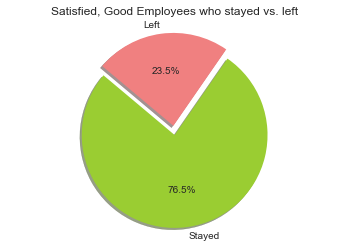

In [105]:
plt.title("Satisfied, Good Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [2933,902]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

### Slicing data -- what differences in behavior are there between satisfied, good employees who stay and those who leave? 


In [31]:
satisfied_good_employees_left = satisfied_good_employees[satisfied_good_employees['turnover'] == 1]
satisfied_good_employees_stayed = satisfied_good_employees[satisfied_good_employees['turnover'] == 0]

### Satisfied, Good Employees Who Stayed vs. Left: Time Committed to Work

averageMonthlyHours & turnover - Pearson R =  (0.41140883250107169, 1.4223259674803419e-156)  and averageMonthlyHours between satisfied, good employees who left/stayed T-Test =  Ttest_indResult(statistic=-27.945361700171091, pvalue=1.4223259674815666e-156) 


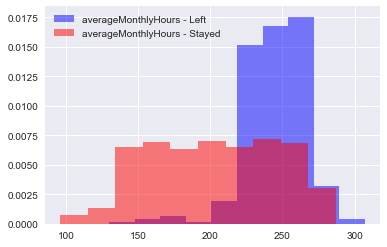

In [114]:
plt.hist(satisfied_good_employees_left['averageMonthlyHours'],alpha=.5,color='blue',label='averageMonthlyHours - Left',normed=True)
plt.hist(satisfied_good_employees_stayed['averageMonthlyHours'],alpha=.5,color='red',label='averageMonthlyHours - Stayed',normed=True)
plt.legend()

pear_r = scipy.stats.pearsonr(satisfied_good_employees['averageMonthlyHours'],satisfied_good_employees['turnover'])
ttest = ttest_ind(satisfied_good_employees_stayed['averageMonthlyHours'],satisfied_good_employees_left['averageMonthlyHours'])

print("averageMonthlyHours & turnover - Pearson R = ",pear_r," and averageMonthlyHours between satisfied, good employees who left/stayed T-Test = ",ttest,"")


### Satisfied, Good Employees Who Stayed vs. Left: Project Commitments

projectCount & turnover - Pearson R =  (0.37098732539938145, 1.9742287562464757e-125)  and projectCount between satisfied, good employees who left/stayed T-Test =  Ttest_indResult(statistic=-24.733299919855281, pvalue=1.9742287562481345e-125) 


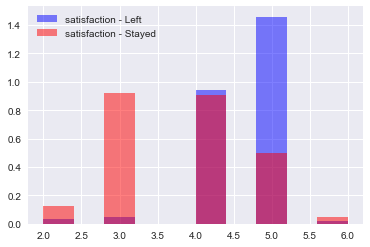

In [115]:
plt.hist(satisfied_good_employees_left['projectCount'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(satisfied_good_employees_stayed['projectCount'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

pear_r = scipy.stats.pearsonr(satisfied_good_employees['projectCount'],satisfied_good_employees['turnover'])
ttest = ttest_ind(satisfied_good_employees_stayed['projectCount'],satisfied_good_employees_left['projectCount'])

print("projectCount & turnover - Pearson R = ",pear_r," and projectCount between satisfied, good employees who left/stayed T-Test = ",ttest,"")


# Satisfied, Good, Veteran Employees Who Stayed vs. Who Left Pie Chart Summary

In [37]:
satisfied_good_veteran = satisfied_good_employees[satisfied_good_employees['yearsAtCompany'] > 4]

satisfied_good_veteran_left = satisfied_good_veteran[satisfied_good_veteran['turnover'] == 1]
satisfied_good_veteran_stayed = satisfied_good_veteran[satisfied_good_veteran['turnover'] == 0]

In [39]:
satisfied_good_veteran.turnover.value_counts()

1    865
0    277
Name: turnover, dtype: int64

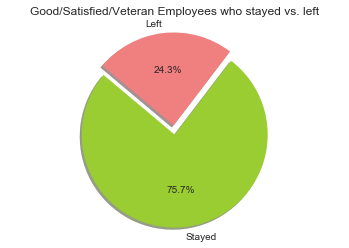

In [38]:
plt.title("Good/Satisfied/Veteran Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [865,277]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

### Satisfied, Good, Veteran Employees Who Stayed vs. Who Left: Time committed to work

averageMonthlyHours & turnover - Pearson R =  (0.5565888912338901, 7.0128958724015061e-94)  and averageMonthlyHours between satisfied, good employees who left/stayed T-Test =  Ttest_indResult(statistic=-22.620214131806446, pvalue=7.0128958724051328e-94) 


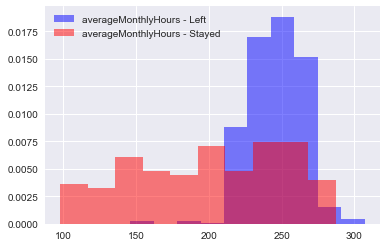

In [155]:
plt.hist(satisfied_good_veteran_left['averageMonthlyHours'],alpha=.5,color='blue',label='averageMonthlyHours - Left',normed=True)
plt.hist(satisfied_good_veteran_stayed['averageMonthlyHours'],alpha=.5,color='red',label='averageMonthlyHours - Stayed',normed=True)
plt.legend()

pear_r = scipy.stats.pearsonr(satisfied_good_veteran['averageMonthlyHours'],satisfied_good_veteran['turnover'])
ttest = ttest_ind(satisfied_good_veteran_stayed['averageMonthlyHours'],satisfied_good_veteran_left['averageMonthlyHours'])

print("averageMonthlyHours & turnover - Pearson R = ",pear_r," and averageMonthlyHours between satisfied, good employees who left/stayed T-Test = ",ttest,"")


###  Satisfied, Good, Veteran Employees Who Stayed vs. Who Left: Project Commitment

projectCount & turnover - Pearson R =  (0.39231053180178649, 2.5459658791025137e-43)  and projectCount between satisfied, good employees who left/stayed T-Test =  Ttest_indResult(statistic=-14.400364460856732, pvalue=2.5459658791034034e-43) 


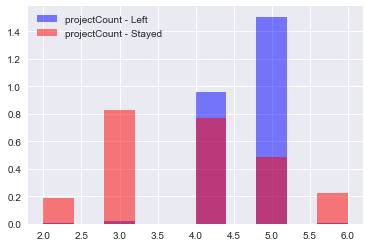

In [124]:
plt.hist(satisfied_good_veteran_left['projectCount'],alpha=.5,color='blue',label='projectCount - Left',normed=True)
plt.hist(satisfied_good_veteran_stayed['projectCount'],alpha=.5,color='red',label='projectCount - Stayed',normed=True)
plt.legend()

pear_r = scipy.stats.pearsonr(satisfied_good_veteran['projectCount'],satisfied_good_veteran['turnover'])
ttest = ttest_ind(satisfied_good_veteran_stayed['projectCount'],satisfied_good_veteran_left['projectCount'])

print("projectCount & turnover - Pearson R = ",pear_r," and projectCount between satisfied, good employees who left/stayed T-Test = ",ttest,"")


# Unsatisfied, Good Employees Who Stayed vs. Who Left Pie Chart Summary


In [120]:
unhappy_good_employees = df[df['evaluation'] > .7]
unhappy_good_employees1 = unhappy_good_employees[unhappy_good_employees['satisfaction'] < .7]

In [121]:
unhappy_good_employees1.turnover.value_counts()

0    2865
1     992
Name: turnover, dtype: int64

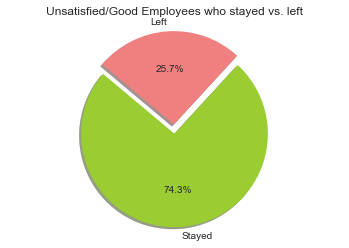

In [122]:
turnover

plt.title("Unsatisfied/Good Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [2865,992]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

In [49]:
unhappy_good_employees_left = unhappy_good_employees1[unhappy_good_employees1['turnover'] == 1]
unhappy_good_employees_stayed = unhappy_good_employees1[unhappy_good_employees1['turnover'] == 0]

### Unsatisfied, Good Employees Who Stayed vs. Who Left: Time Committed to Work

averageMonthlyHours & turnover - Pearson R =  (0.55627021258667952, 2.6808979384588747e-312)  and averageMonthlyHours between satisfied, good employees who left/stayed T-Test =  Ttest_indResult(statistic=-41.561977373083849, pvalue=2.6808979384638154e-312) 


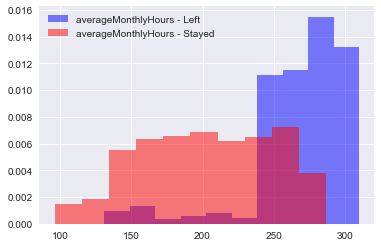

In [127]:
plt.hist(unhappy_good_employees_left['averageMonthlyHours'],alpha=.5,color='blue',label='averageMonthlyHours - Left',normed=True)
plt.hist(unhappy_good_employees_stayed['averageMonthlyHours'],alpha=.5,color='red',label='averageMonthlyHours - Stayed',normed=True)
plt.legend()

pear_r = scipy.stats.pearsonr(unhappy_good_employees1['averageMonthlyHours'],unhappy_good_employees1['turnover'])
ttest = ttest_ind(unhappy_good_employees_stayed['averageMonthlyHours'],unhappy_good_employees_left['averageMonthlyHours'])

print("averageMonthlyHours & turnover - Pearson R = ",pear_r," and averageMonthlyHours between satisfied, good employees who left/stayed T-Test = ",ttest,"")


### Unsatisfied, Good Employees Who Stayed vs. Who Left: Project Commitment

projectCount & turnover - Pearson R =  (0.67865199112513963, 0.0)  and projectCount between satisfied, good employees who left/stayed T-Test =  Ttest_indResult(statistic=-57.370835841065592, pvalue=0.0) 


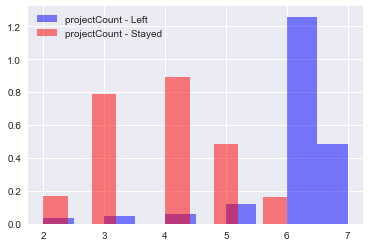

In [129]:
plt.hist(unhappy_good_employees_left['projectCount'],alpha=.5,color='blue',label='projectCount - Left',normed=True)
plt.hist(unhappy_good_employees_stayed['projectCount'],alpha=.5,color='red',label='projectCount - Stayed',normed=True)
plt.legend()

pear_r = scipy.stats.pearsonr(unhappy_good_employees1['projectCount'],unhappy_good_employees1['turnover'])
ttest = ttest_ind(unhappy_good_employees_stayed['projectCount'],unhappy_good_employees_left['projectCount'])

print("projectCount & turnover - Pearson R = ",pear_r," and projectCount between satisfied, good employees who left/stayed T-Test = ",ttest,"")


## BQ2: When does attrition occur? (When do we need to think about intervening?)

### For all employees, spike occurs at year 3
### For good employees, spike occurs at year 4
### For good employees who are highly satisfied, spike occurs at year 5

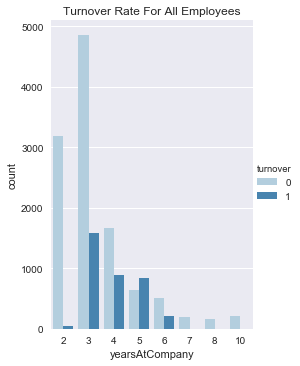

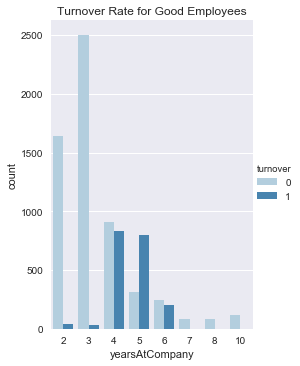

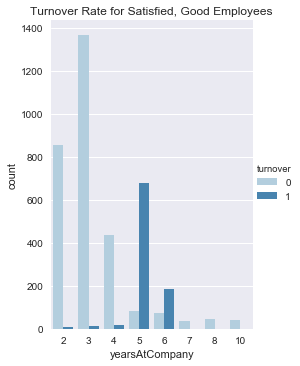

In [85]:
sns.factorplot(x="yearsAtCompany",hue="turnover",data=df,kind="count",size=5,aspect=.7,palette="Blues")
plt.title("Turnover Rate For All Employees")

sns.factorplot(x="yearsAtCompany",hue="turnover",data=good_employees,kind="count",size=5,aspect=.7,palette="Blues")
plt.title("Turnover Rate for Good Employees")

sns.factorplot(x="yearsAtCompany",hue="turnover",data=satisfied_good_employees,kind="count",size=5,aspect=.7,palette="Blues")
plt.title("Turnover Rate for Satisfied, Good Employees")




# BQ3: Looking at how to affect positive organizational change (We don't just want to keep employees at the company, we want to also make sure they're happy!)


# Work conditions

## Project Load

(-0.46202945016700897, 0.0)


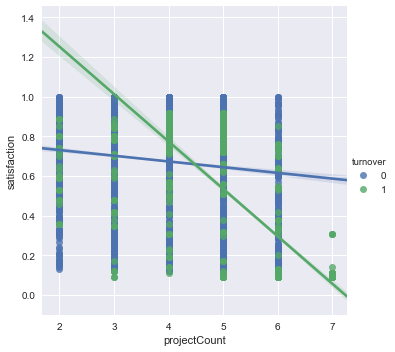

In [132]:
sns.lmplot(x='projectCount',y='satisfaction',hue='turnover',data=good_employees)

pear_r = scipy.stats.pearsonr(good_employees['projectCount'],good_employees['satisfaction'])
print(pear_r)

## Time spent on the job

(-0.26141216377281695, 4.4518768445958277e-122)


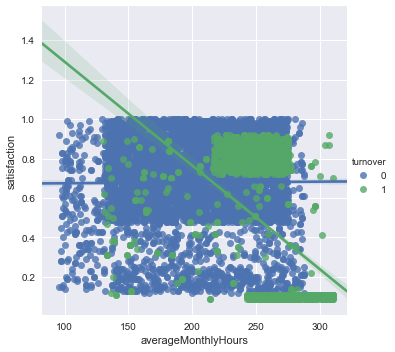

In [133]:
sns.lmplot(x='averageMonthlyHours',y='satisfaction',hue='turnover',data=good_employees)

pear_r = scipy.stats.pearsonr(good_employees['averageMonthlyHours'],good_employees['satisfaction'])
print(pear_r)

# Workplace incentives

## A look at promotions

### Promotions have negligable impact on attrition prevention

In [151]:
good_employees_left = good_employees[good_employees['turnover'] == 1]
good_employees_stayed = good_employees[good_employees['turnover'] == 0]

print(good_employees_left.promotion.value_counts())
print(good_employees_stayed.promotion.value_counts())

print(4/1897)
print(160/5741)


0    1897
1       4
Name: promotion, dtype: int64
0    5741
1     160
Name: promotion, dtype: int64
0.0021085925144965737
0.027869709109911166


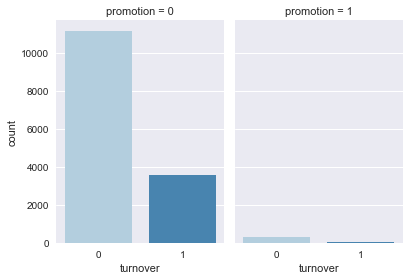

In [152]:
g = sns.factorplot(x="turnover",col="promotion",data=df,kind="count",size=4,aspect=.7,palette="Blues")


## A look at wages

### Proportion of employees who leave decrease as salary increases

low       1146
medium     727
high        28
Name: salary, dtype: int64
1901
low       2670
medium    2645
high       586
Name: salary, dtype: int64
5901


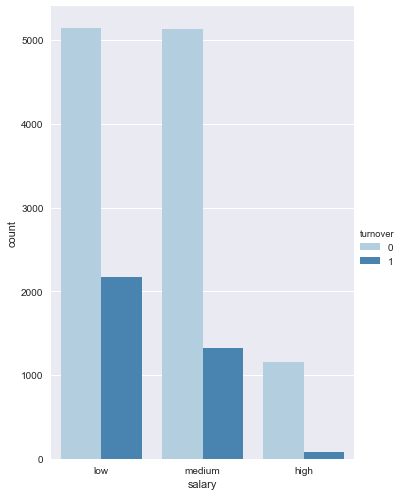

In [153]:
g = sns.factorplot(x="salary",hue="turnover",data=df,kind="count",size=7,aspect=.7,palette="Blues")


print(good_employees_left.salary.value_counts())
print(sum(good_employees_left.salary.value_counts()))
print(good_employees_stayed.salary.value_counts())
print(sum(good_employees_stayed.salary.value_counts()))

high_sal_left = 28/1901
mid_sal_left = 727/1901
low_sal_left = 1146/1901

high_sal_stayed = 586/5901
mid_sal_stayed = 2645/5901
low_sal_stayed = 2670/5901

